# Finding Exoplanets with Machine Learning
Hannah Clemens

# Prototype
## Description

With this project I'm trying to use machine learning to confirm whether or not a star has an exoplanet. NASA has found thousands of stars that could potentially have exoplanets, which is clearly a lot of data to sift through. Using machine learning to quicken this process isn't a new idea; researchers at the University of Warwick were recently able to confirm 50 exoplanets using a gaussian process classifier (supported by some other methods). Their algorithm calculated the probablity of an exoplanet existing, and if there was a less than 1% chance the result was a false positive, it concluded that the exoplanet did actually exist. (https://doi.org/10.1093/mnras/staa2498)

I intend to do something similar (using machine learning to find the probability of the existence of an exoplanet), but I'll be exploring other possible algorithms. I haven't found a good method yet, but I've tested a few so far. The data I'm using for the process of finding the algorithm(s) that work(s) best is a dataset of confirmed/false positive planets found by Kepler (https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative). There are also unconfirmed planets included in the dataset, but I won't be including those in the algorithm search portion of my project. Once I decide on an algorithm (or multiple algorithms), I'll train it on the same data, and then have it look at the confirmed planets in the dataset, and potentially some candidates from TESS (https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=TOI), to see if it can conclusively determine if any planets exist. 

I'll document my search for an accurate algorithm, so all the ideas/methods that I try will stay in the document and I'll explain why each one did/didn't work. If I can't find one that works well, I'll document my results as how close my best algorithm was, and any ideas I might have for improvement. However, if an algorithm does seemingly succeed in my goals, I'll document if it seems to confirm any planets, and the likelihood that those planets really exist. I'll also touch on the practicality of the algorithm, and whether or not it offers any actual improvement. 

## Status
Most of what I've done so far hasn't been coding. I've spent a lot of time trying to make sense of the data and deciding which parameters would be best to use. I've also written basic KNN and decision trees to test the data on since they're the first options I considered, but they weren't as accurate as I would've liked, and they also don't quite do what I think I want to do with the project, so I'll keep trying other options. 

There's still a lot of work I have left to do. I still have to look more into the data and do more astronomy research to figure out exactly how I should be using the data to confirm exoplanets. Once I do that, I still have to implement different algorithms to test the data on. I currently have two classification methods that I've tested the data on, but in the future I'll likely be focusing more on either regression or neural networks, as I believe those will give me a better chance at figuring out the probability that a detected exoplanet is a false positive. 


# Final Writeup
## Transit Overview
Exoplanets are discovered using a variety of methods, but my project focuses on ones that have been found using the transit method. To find planets using the transit method, astronomers look for dips in a star's brightness. These dips usually happen when a planet (or another celestial body) passes in front of a star; the act of the planet passing in front of the star is called a transit. When the planet is in front of the star, it blocks some of its surface from view, thus lessening how much light we can see. The star's brightness over time is graphed on what's called a light curve. 

## Revised Description
The data I used comes from the NASA Exoplanet Archive (https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative). It's a dataset of objects of interest found by Kepler, and includes many of each object's physical properties, as well as how it's been classified (confirmed exoplanet, false positive, or undecided candidate). After I downloaded the dataset, I made a few changes to make my project run smoother. First, I only kept the confirmed exoplanets and the false positives; the undecided candidates wouldn't have been useful for finding an algorithm to confirm planets, so I got rid of those. I also got rid of any objects that were missing values for categories that I used in my project, since they would create errors. Finally, I changed the target classes from "CONFIRMED" and "FALSE POSITIVE" to 1 and 0, respectively. 

When I first started working on this project, I wanted to try to come up with a way of confirming exoplanets where a machine learning algorithm would determine the likelihood of a candidate actually being an exoplanet, rather than just categorizing objects into exoplanet and false positive/not exoplanet. However, as I worked with my data, I realized that it wouldn't really work for that application. (I could just be misunderstanding the data, or there could be a way it could be done that requires much more astronomy or machine learning knowledge than I currently have. I just wasn't able to figure it out, and I didn't want to waste more time than necessary on it). I tried using regression, but it didn't work out very well. So, this project became more of a search for an accurate classification algorithm, rather than for an algorithm that will determine the likelihood of an exoplanet existing. 

Like I said in the description of the project prototype, my project consists of a documented search for the most accurate algorithm. I kept most of my attempts in the notebook (not all, because there were some cases where I made small tweaks to the same thing 10+ times in a row, so I only kept a in few as to not clog the notebook), and I explained what I was doing and commented on the results of each attempt. 

Also, I adapted all of my code from either Professor Spector's class notebooks or from the book. I specifically marked the sections of code I got from the book, so if it isn't marked, it's from the class notebooks. 

## Related Work
I found 3 papers that relate to my project, though I didn't find the last 2 until after I finished the coding part of my project. The first one [1] is the only one I knew about while I was working on my project. To summarize it, researchers used a gaussian process classifier that they reinforced with other models to determine the probability that a transit was caused by an exoplanet, rather than another reason. They've confirmed 50 Kepler candidates as exoplanets using this method. This paper is what inspired me to want to use probablity rather than classification, though I ended up focusing on classification. 

The authors of the second paper [2] looked at stars' light curves from various different types of events (planetary transits, eclipsing binaries, variable stars, and non-periodic signals). They used Random Forest Classifiers and convolutional neural networks to classify the different types of signals, and found that they were accurate about 90% of the time. This paper is similar to my project because it focuses on classification rather than probablity, and also uses random forests, which I found worked really well for me as well. However, my data focused on information about objects of interest (exoplanets and false positives), rather than light curves. 

To summarize the third paper [3], they trained a deep convolutional neural network on light curves to predict whether something was an exoplanet or a false positive. They trained the neural network to rank the likelihood that each transit signal is from an actual exoplanet. Their method is really accurate; in the test set, it ranks plausible planets higher than false positives 98.8% of the time. This is really only similar to my project because it uses transit data and machine learning to try to confirm exoplanets. They use a neural network and a ranking system, while I focus on classification and most of my project avoids neural networks. 

### Citations
[1] David J Armstrong, Jevgenij Gamper, Theodoros Damoulas. (August 2020). Exoplanet Validation with Machine Learning: 50 new validated Kepler planets. Monthly Notices of the Royal Astronomical Society. https://doi.org/10.1093/mnras/staa2498

[2] N Schanche, et al. (November 2018). Machine-learning approaches to exoplanet transit detection and candidate validation in wide-field ground-based surveys. Monthly Notices of the Royal Astronomical Society, Volume 483, Issue 4. https://doi.org/10.1093/mnras/sty3146

[3] Christopher J. Shallue Andrew Vanderburg. (January 2018). Identifying Exoplanets with Deep Learning: A Five-planet Resonant Chain around Kepler-80 and an Eighth Planet around Kepler-90. The Astronomical Journal, Volume 155, Number 2. https://doi.org/10.3847/1538-3881/aa9e09 

## Results
After experimenting with multiple different classification methods (and a couple regression methods), I've found three that can classify objects of interest as either exoplanets or false positives with an accuracy of about 92%. These methods were the random forest classifier (with the number of estimators set to 30), the bagging ensemble using a decision tree, and the bagging ensemble using a random forest. The random forest bagging ensemble had a test accuracy of 92.3%, which is the highest accuracy of all, but the training accuracy was below 100%. 

Many other classification methods were at least 90% accurate. All of the random forest configurations I used were between 91% and 92% accurate. The majority voting ensembles where I used some combination of SVM, decision trees, and/or random forest, the random forest bagging ensemble, and the random forest boosting ensemble all had test accuracies of at least 90%. All of the methods that were at least 90% accurate were looking at all of the numerical datapoints in my dataset, rather than just the signal-to-noise ratio and the transit depth. 

The rest of the methods I tried all fell below 90% accuracy. While some of them were still fairly accurate (test accuracies in the high 80s), others were rather inaccurate (test accuracies in the 60s or low 70s).

## Conclusions and Implications
I consider this project to be a success. Even though none of my methods were 100% accurate, having multiple classification methods that had test accuracies above 90% is a great sign, especially the few that were around 92%. I think that using a combination of my most successful methods and other fairly accurate exoplanet-detecting machine learning methods has the potential to create a highly reliable way to confirm exoplanets. This would increase the number of exoplanets being confirmed, as well as the speed at which they're confirmed, especially since there's currently so much transit/exoplanet data to sift through. 

## Future Work
The first and most important thing to do would be to confirm my methods. They should be double checked on different datasets, like maybe the objects found by TESS or K2. I also think it would be good too experiment a bit more with which parameters are used, since I used quite a few. It's possible that using fewer, but deliberately selected, parameters could increase the accuracy of (some of) the algorithms.

Another good thing to do would be to try to combine the methods I've used with other proven methods. For example, maybe combining my methods with something like the methods of the second paper I discussed (i.e. cross referencing the data of each object with the corresponding light curves) could create a very accurate way to confirm exoplanets. 

It might also be a good idea to continue exploring other classification methods on the same data I used, like maybe more detailed neural networks, since I didn't really explore that. There might be a method, or combination of methods, out there that can classify this data with near-perfect accuracy.  

In [1]:
#Import and standardize data

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

#Read in data file
data = pd.read_csv('Kepler.csv')

X = data.iloc[:, [13,17]].values
y = data.iloc[:, 3].values

#y = [-1 if x=='CONFIRMED' else 1 for x in y]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train) ## Note that we standard only on the basis of the training set
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

I'm using the transit depth and the transit signal-to-noise ratio to determine whether the planet exists or if it's a false positive. I chose them somewhat arbitrarily, but the decision was also based on my knowledge of transits and exoplanet detection (both seem like they could be important). I have to do more research on which other parameters to include, and how they should interact.

In [2]:
#K-nearest-neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

knn.score(X_test, y_test)

0.6239316239316239

In [3]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

tree_model.score(X_test, y_test)

0.7414529914529915

The decision tree had a higher accuracy (about 74.15%) than the KNN (about 62.39%). However, neither was accurate enough to be used to confirm exoplanets. I'll have to keep looking, and also probably add/change parameters.

I've spent some time considering my next steps. At first, I thought I would try some regression models, using the probability that an exoplanet exists as the target class. I thought about how to get that to work for a long time, but then I realized that that isn't really how regression works, and that my dataset likely isn't a good fit for regression models. If I figure something out in the future, I'll try it, but I'm going to keep going with classifiers for now. 

I'm going to try a support vector machine, just to see if it works. 

In [4]:
#plot decision regions
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c=[], #c='', ## CHANGED TO AVOID A WARNING
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

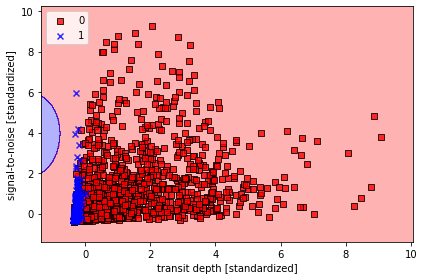

In [5]:
#support vector machine
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm)
plt.xlabel('transit depth [standardized]')
plt.ylabel('signal-to-noise [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

This one didn't classify it well, so I'm going to keep changing the C and gamma values until I either find some that work or conclude that this isn't a good method for my goals.

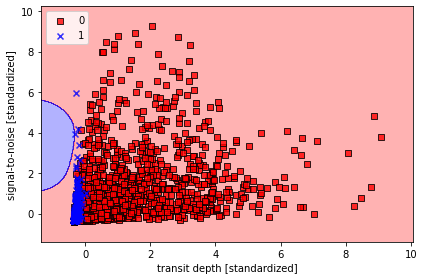

In [6]:
#support vector machine
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=10.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm)
plt.xlabel('transit depth [standardized]')
plt.ylabel('signal-to-noise [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

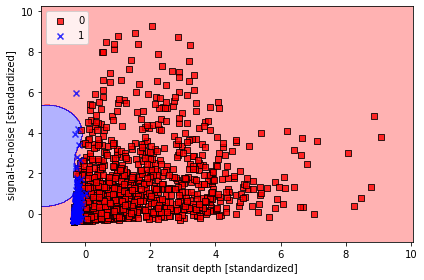

In [7]:
#support vector machine
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.5, C=10.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm)
plt.xlabel('transit depth [standardized]')
plt.ylabel('signal-to-noise [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

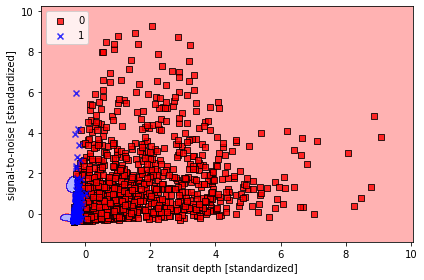

In [8]:
#support vector machine
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=10.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm)
plt.xlabel('transit depth [standardized]')
plt.ylabel('signal-to-noise [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

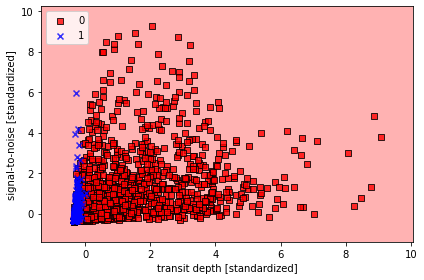

In [9]:
#support vector machine
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm)
plt.xlabel('transit depth [standardized]')
plt.ylabel('signal-to-noise [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Based on my current results with SVM (and also what my data looks like), I don't think I'm going to find any values that work. It might work better if I change the parameters, but for now I'm going to add more parameters and experiment more with decision trees and KNN. Adding all of the numerical parameters in my dataset will give the algorithms more information to work with, and I think that will improve the accuracy.

In [10]:
#Import and standardize data

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

#Read in data file
data = pd.read_csv('Kepler.csv')

X = data.iloc[:, [9,10,11,12,13,14,15,16,17]].values
y = data.iloc[:, 3].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train) ## Note that we standard only on the basis of the training set
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

Here I loaded in the data but instead of just using the transit depth and the noise-to-signal ratio, I also added the orbital period (in days), the transit epoch, the impact parameter, the transit duration, the planetary radius (in Earth radii), the equilibrium temperature (in Kelvin), and the insolation flux. Since I'm not entirely sure which of these are the most important for confirming planets, I'm just adding them all in. Now I'm going to retry KNN and decision tree with these added datapoints. 

In [11]:
#K-nearest-neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

knn.score(X_test, y_test)

0.6239316239316239

In [12]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

tree_model.score(X_test, y_test)

0.8675213675213675

The results of the KNN stayed the same when I added more parameters, but the decision tree improved significantly (from about 74.15% accuracy to about 86.75% accuracy). The decision tree still isn't as accurate as I'd like it, but it's the most promising result so far, so I'm going to keep tweaking it to see what happens. I'm going to start by trying different max depth values.

In [13]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=9, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

tree_model.score(X_test, y_test)

0.8803418803418803

In [14]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=15, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

tree_model.score(X_test, y_test)

0.8899572649572649

In [15]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=19, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

tree_model.score(X_test, y_test)

0.8782051282051282

The highest accuracy I was able to get by changing the max depth was by setting it to 15, which had an accuracy of almost 89%. It isn't much higher than my initial result, but it's something. Now I'm going to see if changing it from gini to entropy will do anything.

In [16]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=19, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

tree_model.score(X_test, y_test)

0.8723290598290598

Using entropy decreased the accuracy a little bit (from about 89% to about 87.23%). I doubt changing the max depth while using entropy will increase accuracy, but I'm still going to try.

In [17]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=10, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

tree_model.score(X_test, y_test)

0.8867521367521367

In [18]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=15, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

tree_model.score(X_test, y_test)

0.8787393162393162

In [19]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=9, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

tree_model.score(X_test, y_test)

0.8904914529914529

In [20]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=11, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

tree_model.score(X_test, y_test)

0.8867521367521367

In [21]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=12, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

tree_model.score(X_test, y_test)

0.875534188034188

It did actually improve accuracy, but just by a little bit. The current highest accuracy I've gotten with the decision tree is about 89.05%, which was with entropy and a max depth of 9. I'm going to do some experimenting with the random state and see if I can get an even higher accuracy.

In [22]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=11, 
                                    random_state=2)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

tree_model.score(X_test, y_test)

0.8867521367521367

In [23]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=11, 
                                    random_state=3)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

tree_model.score(X_test, y_test)

0.8899572649572649

In [24]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=11, 
                                    random_state=4)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

tree_model.score(X_test, y_test)

0.8878205128205128

In [25]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=11, 
                                    random_state=8)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

tree_model.score(X_test, y_test)

0.8856837606837606

The highest accuracy I was able to get by changing the random state is about 89% (this was the result when the random state was set to 3), which isn't very slightly less than a random state of 1. It also isn't as high as it should be for confirming exoplanets, so I'm going to explore other options. I'm going to start with a random forest, since the decision tree has worked the best so far.

In [26]:
#random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9166666666666666

Already the random forest is performing at a higher accuracy than the highest accuracy I was able to get with the decision tree (91.67% accuracy vs. 89.04%). I'm going to keep experimenting with random forest trees; hopefully I'll be able to increase the accuracy even more. 

In [27]:
#random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9193376068376068

The first thing I did was change it from gini to entropy, and the accuracy improved slightly from 91.67% to 91.93%. I'm going to make more changes (but keep it as entropy) and see what happens.

In [28]:
#random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=20, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9182692307692307

In [29]:
#random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=30, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9204059829059829

In [30]:
#random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=24, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9188034188034188

In [31]:
#random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=26, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9188034188034188

The first thing I tried was changing the number of estimators. Changing it to 30 increased the accuracy a bit to around 92.04%, which isn't much of an increase. Now I'm going to try changing the random state to see if that has any effect.

In [32]:
#random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=25, 
                                random_state=2,
                                n_jobs=2)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9155982905982906

In [33]:
#random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=25, 
                                random_state=3,
                                n_jobs=2)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9155982905982906

In [34]:
#random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=25, 
                                random_state=5,
                                n_jobs=2)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9204059829059829

In [35]:
#random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=25, 
                                random_state=6,
                                n_jobs=2)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9172008547008547

The accuracy didn't increase at all by changing the random state. 

In [36]:
#random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=25, 
                                random_state=2,
                                n_jobs=3)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9155982905982906

In [37]:
#random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=25, 
                                random_state=2,
                                n_jobs=4)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9155982905982906

In [38]:
#random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=25, 
                                random_state=2,
                                n_jobs=1)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9155982905982906

I tried changing the number of jobs, but none of the changes were higher than my current highest accuracy. I'm going to move on to trying different types of ensembles to see if any of them are more than 92.04% accurate. 

In [39]:
#Import and standardize data

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

#Read in data file
data = pd.read_csv('Kepler.csv')

X = data.iloc[:, [9,10,11,12,13,14,15,16,17]].values
y = data.iloc[:, 3].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [40]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pipe1 = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=1, gamma=5, C=10.0))

pipe2 = make_pipeline(DecisionTreeClassifier(max_depth=11,
                                             criterion='entropy',
                                             random_state=8))

pipe3 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5,
                                                             p=10,
                                                             metric='minkowski'))

clf_labels = ['SVM', 'Decision tree', 'KNN']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, pipe2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
    print("Accuracy: " + str(round(scores.mean(), 2)) + 
          " Stdev: " + str(round(scores.std(), 3)) +
          " [" + label + "]")

10-fold cross validation:

Accuracy: 0.87 Stdev: 0.022 [SVM]
Accuracy: 0.88 Stdev: 0.013 [Decision tree]
Accuracy: 0.83 Stdev: 0.022 [KNN]


In [41]:
from sklearn.ensemble import VotingClassifier

mv_clf = VotingClassifier(estimators=[('p', pipe1), ('dt', pipe2), ('kn', pipe3)])

clf_labels += ['Majority voting']
all_clf = [pipe1, pipe2, pipe3, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
    print("Accuracy: " + str(round(scores.mean(), 2)) + 
          " Stdev: " + str(round(scores.std(), 3)) +
          " [" + label + "]")

Accuracy: 0.87 Stdev: 0.022 [SVM]
Accuracy: 0.88 Stdev: 0.013 [Decision tree]
Accuracy: 0.83 Stdev: 0.022 [KNN]
Accuracy: 0.88 Stdev: 0.022 [Majority voting]


I started with a majority voting ensemble that used SVM, decision tree, and KNN as its three pipes. I spent a while changing the numbers of the three different pipes, and an accuracy of 88% is the highest I was able to get. I'm going to try a few other ensemble methods and some other types of pipes, but I doubt I'm going to get a higher accuracy than I got with the random forest (92.04%). 

In [42]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score


pipe1 = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=1, gamma=5, C=10.0))

pipe2 = make_pipeline(DecisionTreeClassifier(max_depth=11,
                                             criterion='entropy',
                                             random_state=8))

pipe3 = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='entropy',
                                            n_estimators=25, 
                                            random_state=2,
                                            n_jobs=4))

clf_labels = ['SVM', 'Decision tree', 'Random Forest']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, pipe2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
    print("Accuracy: " + str(round(scores.mean(), 2)) + 
          " Stdev: " + str(round(scores.std(), 3)) +
          " [" + label + "]")

10-fold cross validation:

Accuracy: 0.87 Stdev: 0.022 [SVM]
Accuracy: 0.88 Stdev: 0.013 [Decision tree]
Accuracy: 0.91 Stdev: 0.019 [Random Forest]


In [43]:
from sklearn.ensemble import VotingClassifier

mv_clf = VotingClassifier(estimators=[('p', pipe1), ('dt', pipe2), ('rf', pipe3)])

clf_labels += ['Majority voting']
all_clf = [pipe1, pipe2, pipe3, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
    print("Accuracy: " + str(round(scores.mean(), 2)) + 
          " Stdev: " + str(round(scores.std(), 3)) +
          " [" + label + "]")

Accuracy: 0.87 Stdev: 0.022 [SVM]
Accuracy: 0.88 Stdev: 0.013 [Decision tree]
Accuracy: 0.91 Stdev: 0.019 [Random Forest]
Accuracy: 0.9 Stdev: 0.017 [Majority voting]


By replacing the KNN pipe with random forest, the accuracy increased from 88% to 90%. This still isn't higher than what I got with just the random forest (92.04%), but it's an improvement from the last ensemble. I'm going to make some changes to see if I can make the accuracy any higher.

In [44]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score


pipe1 = make_pipeline(DecisionTreeClassifier(max_depth=11,
                                             criterion='gini',
                                             random_state=8))

pipe2 = make_pipeline(DecisionTreeClassifier(max_depth=11,
                                             criterion='entropy',
                                             random_state=8))

pipe3 = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='entropy',
                                            n_estimators=25, 
                                            random_state=2,
                                            n_jobs=4))

clf_labels = ['Decision tree (gini)', 'Decision tree (entropy)', 'Random Forest']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, pipe2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
    print("Accuracy: " + str(round(scores.mean(), 2)) + 
          " Stdev: " + str(round(scores.std(), 3)) +
          " [" + label + "]")

10-fold cross validation:

Accuracy: 0.88 Stdev: 0.013 [Decision tree (gini)]
Accuracy: 0.88 Stdev: 0.013 [Decision tree (entropy)]
Accuracy: 0.91 Stdev: 0.019 [Random Forest]


In [45]:
from sklearn.ensemble import VotingClassifier

mv_clf = VotingClassifier(estimators=[('dtg', pipe1), ('dte', pipe2), ('rf', pipe3)])

clf_labels += ['Majority voting']
all_clf = [pipe1, pipe2, pipe3, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
    print("Accuracy: " + str(round(scores.mean(), 2)) + 
          " Stdev: " + str(round(scores.std(), 3)) +
          " [" + label + "]")

Accuracy: 0.88 Stdev: 0.013 [Decision tree (gini)]
Accuracy: 0.88 Stdev: 0.013 [Decision tree (entropy)]
Accuracy: 0.91 Stdev: 0.019 [Random Forest]
Accuracy: 0.9 Stdev: 0.016 [Majority voting]


I tried replacing the SVM with a decision tree set to gini and it didn't increase the accuracy, but it did very slightly decrease the standard deviation (from 0.017 to 0.016). Since this is the best result I've gotten from ensembles on the training data, I'm going to run this one on the testing data and see what happens.

In [46]:
pipe1.fit(X_train, y_train)

y_pred = pipe1.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])
print('Accuracy:', pipe1.score(X_test, y_test))

Misclassified test set examples: 220
Out of a total of: 1872
Accuracy: 0.8824786324786325


In [47]:
pipe2.fit(X_train, y_train)

y_pred = pipe2.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])
print('Accuracy:', pipe2.score(X_test, y_test))

Misclassified test set examples: 214
Out of a total of: 1872
Accuracy: 0.8856837606837606


In [48]:
pipe3.fit(X_train, y_train)

y_pred = pipe3.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])
print('Accuracy:', pipe3.score(X_test, y_test))

Misclassified test set examples: 154
Out of a total of: 1872
Accuracy: 0.9177350427350427


In [49]:
mv_clf.fit(X_train, y_train)

y_pred = mv_clf.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])
print('Accuracy:', mv_clf.score(X_test, y_test))

Misclassified test set examples: 173
Out of a total of: 1872
Accuracy: 0.9075854700854701


The accuracy of the ensemble on the testing data is about 90.76%, which is still lower than the highest I've gotten with the random forest (though the random forest pipe in the ensemble was about 91.77% accurate, which is quite close to the record of 92.04%).I don't think I'm going to get any more accurate using majority voting, so I'm going to experiment with some other types of ensembles.

In [50]:
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier(criterion='entropy', 
                              random_state=1,
                              max_depth=None)
bag = BaggingClassifier (base_estimator=tree,
                         n_estimators=500, 
                         max_samples=1.0,
                         max_features=1.0,
                         bootstrap=True,
                         bootstrap_features=False,
                         n_jobs=1,
                         random_state=1)

from sklearn.metrics import accuracy_score
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print ('Bagging train/test accuracies %.3f/%.3f'
          % (bag_train, bag_test))

Bagging train/test accuracies 1.000/0.920


The bagging ensemble using a decision tree had a 92% accuracy on the testing data (and 100% on the training data), which is essentially the same as the highest. I'm going to keep experimenting with different methods to see if any of them are any more accurate. 

In [51]:
from sklearn.ensemble import BaggingClassifier
forest = RandomForestClassifier(criterion='entropy',
                                    n_estimators=25, 
                                    random_state=2,
                                    n_jobs=4)
bag = BaggingClassifier (base_estimator=forest,
                         n_estimators=500, 
                         max_samples=1.0,
                         max_features=1.0,
                         bootstrap=True,
                         bootstrap_features=False,
                         n_jobs=1,
                         random_state=1)

from sklearn.metrics import accuracy_score
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print ('Bagging train/test accuracies %.3f/%.3f' 
           % (bag_train, bag_test))

Bagging train/test accuracies 0.982/0.923


I tried using bagging with random forest instead of decision tree, and it had a slightly higher test accuracy, but a lower training accuracy. I'm not sure if that's a net improvement or not.

In [52]:
from sklearn.ensemble import BaggingClassifier
svm = SVC(kernel='rbf', random_state=1, gamma=5, C=10.0)
bag = BaggingClassifier (base_estimator=svm,
                         n_estimators=500, 
                         max_samples=1.0,
                         max_features=1.0,
                         bootstrap=True,
                         bootstrap_features=False,
                         n_jobs=1,
                         random_state=1)

from sklearn.metrics import accuracy_score
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print ('Bagging train/test accuracies %.3f/%.3f' 
           % (bag_train, bag_test))

Bagging train/test accuracies 1.000/0.624


Out of curiousity, I tried bagging with SVM, but it didn't work well at all (62.4% accuracy on the test set). Next, I'm going to try boosting.

In [53]:
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1,
                              random_state=1)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, 
                         learning_rate=0.1,
                         random_state=1)

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))

AdaBoost train/test accuracies 0.906/0.902


Boosting didn't improve the accuracy either, so I'm going to move on from ensembles and look for other options. I haven't tried logistic regression yet, so I'll try it now.

In [54]:
#Import and standardize data

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

#Read in data file
data = pd.read_csv('Kepler.csv')

X = data.iloc[:, [9,10,11,12,13,14,15,16,17]].values
y = data.iloc[:, 3].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train) ## Note that we standard only on the basis of the training set
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [55]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

lr.score(X_test_std, y_test)

0.8477564102564102

The logistic regression model was only 84.78% accurate. I don't think any configuration of values will increase the accuracy enough for it to be worth exploring more, so I need to try something else.

I took another look at my dataset and realized there's a column that gives a score based on the likelihood that an exoplanet exists. It's on a scale from 0 to 1, and the higher it is, the more likely there's an exoplanet. If it has a score of 0, they're certain its a false positive. If there's a score of 1, they're certain its an exoplanet. I was going to use this to do regression to see how accurately the aglorithms could predict the likelihood of there being an exoplanet, but I realized there isn't really a threshold. For example, there are some objects of interest that are labeled "confirmed," but have a very low score, sometimes a score of 0. There are also some false postiives that have a score of 1. Since I'm not sure how exactly these numbers and labels match up, and I also can't seem to find a threshold for definitive exoplanets, I'm going to try regression once to see what happens, but I likely won't continue with it. 

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

data = pd.read_csv('Kepler.csv')

X = data.iloc[:, [9,10,11,12,13,14,15,16,17]].values
y = data.iloc[:, 4].values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

sc_y = StandardScaler()
sc_y.fit(y_train[:, np.newaxis])
y_train_std = sc_y.transform(y_train[:, np.newaxis]).flatten()
y_test_std = sc_y.transform(y_test[:, np.newaxis]).flatten()

##################

from sklearn.linear_model import LinearRegression

est = LinearRegression()
est.fit(X_train_std, y_train_std)

##################

y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_std, y_train_pred),
        mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_std, y_train_pred),
        r2_score(y_test_std, y_test_pred)))

MSE train: 0.718, test: 0.710
R^2 train: 0.282, test: 0.285


I tried linear regression, and it had a high error and a low R^2, just like I expected. I'm going to try a random forest regressor just to make sure that regression isn't the right path to take. 

In [57]:
from sklearn.ensemble import RandomForestRegressor

est = RandomForestRegressor(n_estimators=1000, 
                            criterion='mse', 
                            random_state=1, 
                            n_jobs=-1)
est.fit(X_train_std, y_train_std)

##################

y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_std, y_train_pred),
        mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_std, y_train_pred),
        r2_score(y_test_std, y_test_pred)))

MSE train: 0.046, test: 0.339
R^2 train: 0.954, test: 0.659


The random forest regressor had a signficantly lower error and a significantly higher R^2 than linear regression, though it still didn't give great results. I don't think regression is the way to go with my dataset. I'm going to try a neural network next. I'm running out of time, so I think that will be the last thing I try, regardless of how well it works. 

I tried installing tensorflow to do the neural network, but it kept giving me errors and I couldn't figure out why. I restarted the kernel, restarted my computer, and spent at least an hour trying to figure out what went wrong and how to fix it, but I couldn't do it. I'm going to try using the hard-coded multi-layer perceptron from the book.

In [58]:
#Read in data file
data = pd.read_csv('Kepler.csv')

X = data.iloc[:, [9,10,11,12,13,14,15,16,17]].values
y = data.iloc[:, 3].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)


In [59]:
#This code is from Python Machine Learning 3rd Edition by Sebastian Raschka
import sys

class NeuralNetMLP(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.

    Parameters
    ------------
    n_hidden : int (default: 30)
        Number of hidden units.
    l2 : float (default: 0.)
        Lambda value for L2-regularization.
        No regularization if l2=0. (default)
    epochs : int (default: 100)
        Number of passes over the training set.
    eta : float (default: 0.001)
        Learning rate.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent circles.
    minibatch_size : int (default: 1)
        Number of training examples per minibatch.
    seed : int (default: None)
        Random seed for initializing weights and shuffling.

    Attributes
    -----------
    eval_ : dict
      Dictionary collecting the cost, training accuracy,
      and validation accuracy for each epoch during training.

    """
    def __init__(self, n_hidden=30,
                 l2=0., epochs=100, eta=0.001,
                 shuffle=True, minibatch_size=1, seed=None):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size

    def _onehot(self, y, n_classes):
        """Encode labels into one-hot representation

        Parameters
        ------------
        y : array, shape = [n_examples]
            Target values.
        n_classes : int
            Number of classes

        Returns
        -----------
        onehot : array, shape = (n_examples, n_labels)

        """
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def _forward(self, X):
        """Compute forward propagation step"""

        # step 1: net input of hidden layer
        # [n_examples, n_features] dot [n_features, n_hidden]
        # -> [n_examples, n_hidden]
        z_h = np.dot(X, self.w_h) + self.b_h

        # step 2: activation of hidden layer
        a_h = self._sigmoid(z_h)

        # step 3: net input of output layer
        # [n_examples, n_hidden] dot [n_hidden, n_classlabels]
        # -> [n_examples, n_classlabels]

        z_out = np.dot(a_h, self.w_out) + self.b_out

        # step 4: activation output layer
        a_out = self._sigmoid(z_out)

        return z_h, a_h, z_out, a_out

    def _compute_cost(self, y_enc, output):
        """Compute cost function.

        Parameters
        ----------
        y_enc : array, shape = (n_examples, n_labels)
            one-hot encoded class labels.
        output : array, shape = [n_examples, n_output_units]
            Activation of the output layer (forward propagation)

        Returns
        ---------
        cost : float
            Regularized cost

        """
        L2_term = (self.l2 *
                   (np.sum(self.w_h ** 2.) +
                    np.sum(self.w_out ** 2.)))

        term1 = -y_enc * (np.log(output))
        term2 = (1. - y_enc) * np.log(1. - output)
        cost = np.sum(term1 - term2) + L2_term
        
        # If you are applying this cost function to other
        # datasets where activation
        # values maybe become more extreme (closer to zero or 1)
        # you may encounter "ZeroDivisionError"s due to numerical
        # instabilities in Python & NumPy for the current implementation.
        # I.e., the code tries to evaluate log(0), which is undefined.
        # To address this issue, you could add a small constant to the
        # activation values that are passed to the log function.
        #
        # For example:
        #
        # term1 = -y_enc * (np.log(output + 1e-5))
        # term2 = (1. - y_enc) * np.log(1. - output + 1e-5)
        
        return cost

    def predict(self, X):
        """Predict class labels

        Parameters
        -----------
        X : array, shape = [n_examples, n_features]
            Input layer with original features.

        Returns:
        ----------
        y_pred : array, shape = [n_examples]
            Predicted class labels.

        """
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        """ Learn weights from training data.

        Parameters
        -----------
        X_train : array, shape = [n_examples, n_features]
            Input layer with original features.
        y_train : array, shape = [n_examples]
            Target class labels.
        X_valid : array, shape = [n_examples, n_features]
            Sample features for validation during training
        y_valid : array, shape = [n_examples]
            Sample labels for validation during training

        Returns:
        ----------
        self

        """
        n_output = np.unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]

        ########################
        # Weight initialization
        ########################

        # weights for input -> hidden
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale=0.1,
                                      size=(n_features, self.n_hidden))

        # weights for hidden -> output
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1,
                                        size=(self.n_hidden, n_output))

        epoch_strlen = len(str(self.epochs))  # for progress formatting
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        y_train_enc = self._onehot(y_train, n_output)

        # iterate over training epochs
        for i in range(self.epochs):

            # iterate over minibatches
            indices = np.arange(X_train.shape[0])

            if self.shuffle:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.minibatch_size +
                                   1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]

                # forward propagation
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])

                ##################
                # Backpropagation
                ##################

                # [n_examples, n_classlabels]
                delta_out = a_out - y_train_enc[batch_idx]

                # [n_examples, n_hidden]
                sigmoid_derivative_h = a_h * (1. - a_h)

                # [n_examples, n_classlabels] dot [n_classlabels, n_hidden]
                # -> [n_examples, n_hidden]
                delta_h = (np.dot(delta_out, self.w_out.T) *
                           sigmoid_derivative_h)

                # [n_features, n_examples] dot [n_examples, n_hidden]
                # -> [n_features, n_hidden]
                grad_w_h = np.dot(X_train[batch_idx].T, delta_h)
                grad_b_h = np.sum(delta_h, axis=0)

                # [n_hidden, n_examples] dot [n_examples, n_classlabels]
                # -> [n_hidden, n_classlabels]
                grad_w_out = np.dot(a_h.T, delta_out)
                grad_b_out = np.sum(delta_out, axis=0)

                # Regularization and weight updates
                delta_w_h = (grad_w_h + self.l2*self.w_h)
                delta_b_h = grad_b_h # bias is not regularized
                self.w_h -= self.eta * delta_w_h
                self.b_h -= self.eta * delta_b_h

                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out  # bias is not regularized
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out

            #############
            # Evaluation
            #############

            # Evaluation after each epoch during training
            z_h, a_h, z_out, a_out = self._forward(X_train)
            
            cost = self._compute_cost(y_enc=y_train_enc,
                                      output=a_out)

            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)

            train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) /
                         X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float) /
                         X_valid.shape[0])

            sys.stderr.write('\r%0*d/%d | Cost: %.2f '
                             '| Train/Valid Acc.: %.2f%%/%.2f%% ' %
                             (epoch_strlen, i+1, self.epochs, cost,
                              train_acc*100, valid_acc*100))
            sys.stderr.flush()

            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)

        return self

In [60]:
#This code is from Python Machine Learning 3rd Edition by Sebastian Raschka

n_epochs = 200

nn = NeuralNetMLP(n_hidden=100, 
                  l2=0.01, 
                  epochs=n_epochs, 
                  eta=0.0005,
                  minibatch_size=100, 
                  shuffle=True,
                  seed=1)

nn.fit(X_train=X_train[:4004], 
       y_train=y_train[:4004],
       X_valid=X_train[4004:],
       y_valid=y_train[4004:])

200/200 | Cost: 3968.18 | Train/Valid Acc.: 76.85%/76.10% 

In [61]:
#This code is from Python Machine Learning 3rd Edition by Sebastian Raschka

y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred)
       .astype(np.float) / X_test.shape[0])

print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 78.15%


The neural network was fairly low in accuracy (78.15% on the test data), so I'm going to tweak some of the numbers and see if it helps.

In [62]:
#This code is from Python Machine Learning 3rd Edition by Sebastian Raschka

n_epochs = 200

nn = NeuralNetMLP(n_hidden=200, 
                  l2=0.01, 
                  epochs=n_epochs, 
                  eta=0.0005,
                  minibatch_size=100, 
                  shuffle=True,
                  seed=1)

nn.fit(X_train=X_train[:4004], 
       y_train=y_train[:4004],
       X_valid=X_train[4004:],
       y_valid=y_train[4004:])

200/200 | Cost: 4595.87 | Train/Valid Acc.: 68.61%/68.13% 

In [63]:
#This code is from Python Machine Learning 3rd Edition by Sebastian Raschka

n_epochs = 200

nn = NeuralNetMLP(n_hidden=100, 
                  l2=0.01, 
                  epochs=n_epochs, 
                  eta=0.0005,
                  minibatch_size=100, 
                  shuffle=True,
                  seed=1)

nn.fit(X_train=X_train[:3000], 
       y_train=y_train[:3000],
       X_valid=X_train[3000:],
       y_valid=y_train[3000:])

200/200 | Cost: 3558.85 | Train/Valid Acc.: 63.13%/60.82% 

In [64]:
#This code is from Python Machine Learning 3rd Edition by Sebastian Raschka

n_epochs = 200

nn = NeuralNetMLP(n_hidden=100, 
                  l2=0.01, 
                  epochs=n_epochs, 
                  eta=0.0005,
                  minibatch_size=100, 
                  shuffle=True,
                  seed=1)

nn.fit(X_train=X_train[:2000], 
       y_train=y_train[:2000],
       X_valid=X_train[2000:],
       y_valid=y_train[2000:])

200/200 | Cost: 1846.85 | Train/Valid Acc.: 78.05%/76.94% 

In [65]:
#This code is from Python Machine Learning 3rd Edition by Sebastian Raschka

n_epochs = 100

nn = NeuralNetMLP(n_hidden=100, 
                  l2=0.01, 
                  epochs=n_epochs, 
                  eta=0.0005,
                  minibatch_size=100, 
                  shuffle=True,
                  seed=1)

nn.fit(X_train=X_train[:4004], 
       y_train=y_train[:4004],
       X_valid=X_train[4004:],
       y_valid=y_train[4004:])

100/100 | Cost: 4059.77 | Train/Valid Acc.: 75.05%/71.70% 

In [66]:
#This code is from Python Machine Learning 3rd Edition by Sebastian Raschka

n_epochs = 200

nn = NeuralNetMLP(n_hidden=100, 
                  l2=0.01, 
                  epochs=n_epochs, 
                  eta=0.0005,
                  minibatch_size=200, 
                  shuffle=True,
                  seed=1)

nn.fit(X_train=X_train[:4004], 
       y_train=y_train[:4004],
       X_valid=X_train[4004:],
       y_valid=y_train[4004:])

200/200 | Cost: 4790.32 | Train/Valid Acc.: 62.41%/61.54% 

In [67]:
#This code is from Python Machine Learning 3rd Edition by Sebastian Raschka

n_epochs = 200

nn = NeuralNetMLP(n_hidden=100, 
                  l2=0.01, 
                  epochs=n_epochs, 
                  eta=0.0005,
                  minibatch_size=50, 
                  shuffle=True,
                  seed=1)

nn.fit(X_train=X_train[:4004], 
       y_train=y_train[:4004],
       X_valid=X_train[4004:],
       y_valid=y_train[4004:])

200/200 | Cost: 3805.98 | Train/Valid Acc.: 76.70%/75.82% 

None of the changes I made seem to have any substantial positive increase on the accuracy, so I'm going to stop here. I'm pretty satisified with the highest accuracy I was able to get (around 92%), and I think the methods that achieved that accuracy could be useful tools for exoplanet detection when combined with other methods to further increase accuracy. 